<h1>Time Series Analysis of 'Milk' </h1>

<h2>Objective<h/2>

<h3>Analyzing Milk Consumption by Month,Week, and Day to Identify Trends,Uncover Patterns,and Gain Insights</h3>

In [35]:
# Importing necessary libraries: numpy and pandas
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 

<h1>Step:1-Data Preparation</h1>

In [36]:
# Loading the dataset for analysis
analysis_data=pd.read_csv(r'C:\Users\vs390\OneDrive\Desktop\Swiggy instamart delivery prediction\data\test.csv')
analysis_data.head(2)

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
0,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Milk,143,Clear,Moderate,0,...,19.320305,26-35,4.089132,True,80.454587,True,23.395002,1.366587,1.985490,7.916775
1,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Bread,121,Clear,Moderate,0,...,16.529100,18-25,4.403027,False,43.380880,True,20.877744,1.421246,1.043545,5.236938


<h2>Step:2-Exploring the Data (EDA) for Time Series</h2>

In [37]:
# Getting the unique products in the 'Product' column to see all available products
analysis_data['Product'].unique()

array(['Milk', 'Bread', 'Snacks', 'Vegetables', 'Fruits'], dtype=object)

In [38]:
# Filter the dataset to include only rows where the 'Product' column is equal to 'Milk'
analysis_data=analysis_data[
    (analysis_data['Product']== 'Milk')
]
analysis_data['Product'].unique()

array(['Milk'], dtype=object)

<h3>Analysis of Products and Filtering for Milk Data</h3>
<h4>I checked the unique products in the dataset, and there are five: Milk, Bread, Snacks, Vegetables, and Fruits. I then filtered the data to focus on Milk.</h4>

In [39]:
# Grouping the filtered data by 'Location' and 'Product' and counting the occurrences of each location for 'Milk'
milk_by_location=analysis_data.groupby('Location')['Product'].size()
milk_by_location

Location
Indiranagar    8737
Koramangala    8737
Whitefield     8737
Name: Product, dtype: int64

In [40]:
# Reset the index of 'milk_by_location' and rename the 'count' column to 'Milk count'
plot_data=milk_by_location.reset_index(name='Milk count')

# Create a bar plot
fig=px.bar(plot_data,x='Location',y='Milk count',
           title="Milk by location",
           labels={'Milk count':'Milk count','Location':'Location'})
fig.show()

In [41]:
# Convert the 'Date' column to datetime format
analysis_data['Date']=pd.to_datetime(analysis_data['Date'])  
  
# Extract the month name from the 'Date' column              
analysis_data['Month']=analysis_data['Date'].dt.month_name()

In [42]:
# Grouping data by 'Month' and 'Location' to analyze milk count
milk_by_month=analysis_data.groupby(['Month'])['Location'].value_counts()
milk_by_month

Month      Location   
April      Indiranagar    720
           Koramangala    720
           Whitefield     720
August     Indiranagar    744
           Koramangala    744
           Whitefield     744
December   Indiranagar    721
           Koramangala    721
           Whitefield     721
February   Indiranagar    672
           Koramangala    672
           Whitefield     672
January    Indiranagar    744
           Koramangala    744
           Whitefield     744
July       Indiranagar    744
           Koramangala    744
           Whitefield     744
June       Indiranagar    720
           Koramangala    720
           Whitefield     720
March      Indiranagar    744
           Koramangala    744
           Whitefield     744
May        Indiranagar    744
           Koramangala    744
           Whitefield     744
November   Indiranagar    720
           Koramangala    720
           Whitefield     720
October    Indiranagar    744
           Koramangala    744
           Whitef

In [43]:
# Preparing data for monthly visualization
plot_data=milk_by_month.reset_index(name='milk_count')

# Creating a bar plot for milk count by month
fig=px.bar(plot_data,x='Location',y='milk_count',color='Month',
           title=('Milk count by month'),
           labels={'Location':'Location','milk_count':'milk_count','Month':'Month'})
fig.show()



In [44]:
# Group by 'Day_of_Week' ,'Location' and count occurrences of 'Milk'
milk_by_weekday=analysis_data.groupby(['Day_of_Week','Location'])['Product'].value_counts()
milk_by_weekday

Day_of_Week  Location     Product
Friday       Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Monday       Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Saturday     Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Sunday       Indiranagar  Milk       1249
             Koramangala  Milk       1249
             Whitefield   Milk       1249
Thursday     Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Tuesday      Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Wednesday    Indiranagar  Milk       1248
             Koramangala  Milk       1248
             Whitefield   Milk       1248
Name: count, dtype: int64

In [45]:
# Reset the index of 'milk_by_weekday' to convert it into a DataFrame
# and rename the count column to 'Milk_count'

plot_data=milk_by_weekday.reset_index(name='Milk_count')

# Create a scatter plot
fig=px.bar(plot_data,x='Location',y='Milk_count',color='Day_of_Week',
               title='Milk count by weekday ',
               labels={'Location':'Location','Milk_count':'Milk_count','Day_of_Week':'Day_of_Week'})
fig.show()

In [46]:
# Grouping and analyzing hourly milk orders
milk_by_hour=analysis_data.groupby(['Date','Hour'])['Order_Volume'].sum().reset_index()
milk_by_hour

,Date,Hour,Order_Volume
0,2023-01-01,0,379
1,2023-01-01,1,367
2,2023-01-01,2,401
3,2023-01-01,3,368
4,2023-01-01,4,360
...,...,...,...
8732,2023-12-30,20,1130
8733,2023-12-30,21,487
8734,2023-12-30,22,462
8735,2023-12-30,23,381


In [47]:
# Visualizing milk order volume by hour
fig=px.bar(milk_by_hour,x='Hour',y='Order_Volume',color='Date',
           title='Total Milk Order volumne in hour', 
           labels={'Hour':'Hour','Order_Volume':'Order_Volume','Date':'Date'})
fig.show()


<h1>Findings of milk on based  on location ,month and hourly data:</h1>


<h2>1. Milk Consumption by Location</h2>
<h3>Key Observation: Milk orders are the same across Koramangala, Indiranagar, and Whitefield, with 744 orders each in January.</h3>

<h2>2. Milk Consumption by Month</h2>
<h3>Key Observation: August ,January and March have the highest milk consumption (744 orders). February shows a slight dip with (672 orders.)</h3>

<h2>3.Hourly Milk Consumption</h2>
<h3>Key Observation: Orders are higher in the morning. For example, on 2023-01-01, at 10:00 AM, there were 401 orders, while at 4:00 PM, it dropped to 367 orders.</h3>


<h2>Conclusion:</h2>
<p>Milk consumption is consistent across locations.</p>
<p>Higher orders are observed in  August,January and March.</p>
<p>Morning hours see higher milk consumption compared to the afternoon.</p>




In [48]:
# Group data by 'Location' and 'Weather' and count the occurrences of 'Order_Volume'
location_weather_data=analysis_data.groupby(['Location','Weather'])['Order_Volume'].size().reset_index()
# Create a bar plot to visualize the relationship between Location, Order Volume, and Weather
fig=px.bar(location_weather_data,x='Location',y='Order_Volume',color='Weather',
               title=('Order volume by location and weather'),
               labels={'Location':'Location','Order_Volume':'Order_Volume','Weather':'Weather'})
fig.show()

In [49]:
location_weather_traffic_data=analysis_data.groupby(['Location','Weather','Traffic'])['Order_Volume'].size().reset_index()
fig=px.bar(location_weather_traffic_data,x='Location',y='Order_Volume',color='Traffic',facet_col='Weather',
           title='Order Volume by Location, Traffic, and Weather',
           labels={'Location':'Location','Order_Volume':'Order_Volume','Traffic':'Traffic','Weather':'Weather'})
fig.show()

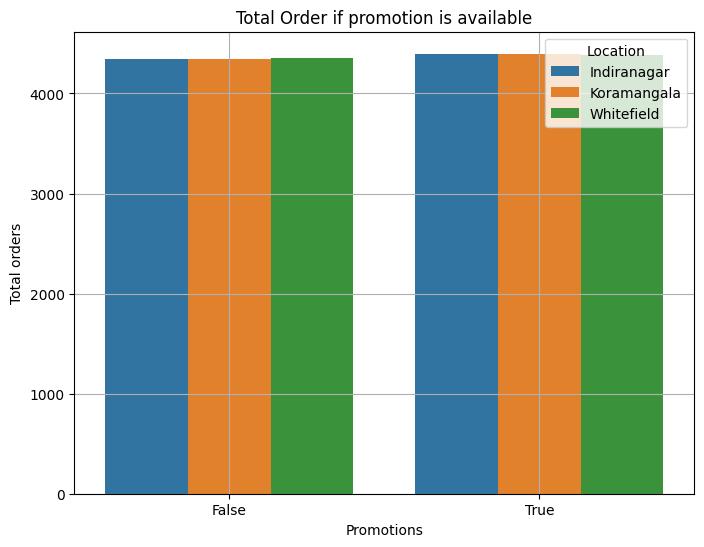

In [58]:
order_size_by_location_promotion=analysis_data.groupby(['Location','Coupon_Used'])['Order_Volume'].size().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=order_size_by_location_promotion,x='Coupon_Used',y='Order_Volume',hue='Location')
plt.title('Total Order if promotion is available')
plt.xlabel('Promotions')
plt.ylabel('Total orders')
plt.grid(True)
plt.show()

In [66]:
order_volume_by_coupon_promotion=analysis_data.groupby(['Promotion','Coupon_Used','Location'])['Order_Volume'].size().reset_index()
plot=px.line(order_volume_by_coupon_promotion,x='Promotion',y='Order_Volume',color='Coupon_Used',facet_col='Location',
        title=('Orders after using coupon at promotions at different locations'),
        labels={'Promotion':'Promotion','Order_volume':'Order_volume','Coupon_Used':'Coupon_Used','Location':'Location'})
plot.show()

In [70]:
average_order_volume_by_holiday=analysis_data.groupby(['Is_Holiday','Location'])['Order_Volume'].mean().reset_index()
average_order_volume_by_holiday

,Is_Holiday,Location,Order_Volume
0,0,Indiranagar,186.945145
1,0,Koramangala,186.959033
2,0,Whitefield,187.029395
3,1,Indiranagar,180.875000
4,1,Koramangala,181.125000
5,1,Whitefield,181.458333


In [74]:
order_volume_by_holiday=analysis_data.groupby(['Is_Holiday','Location'])['Order_Volume'].size().reset_index()
fig=px.box(order_volume_by_holiday,x='Location',y='Order_Volume',color='Is_Holiday',
       title=('Order Volume by holiday on particular location'),
       labels={'Location':'Location','Order_Volume':'Order_Volume','Is_Holiday':'Is_Holiday'})
fig.show()


<h1>Time Series Analysis of "Milk" in Indranagar</h1>

In [60]:
analysis_data.columns

Index(['DateTime', 'Date', 'Hour', 'Day_of_Week', 'Location', 'Product',
       'Order_Volume', 'Weather', 'Traffic', 'Is_Holiday', 'Promotion',
       'Customer_Rating', 'Distance_to_Customer', 'Warehouse_Stock_Level',
       'Average_Preparation_Time', 'Delivery_Staff_Availability',
       'Temperature', 'Humidity', 'Air_Quality_Index', 'Vehicle_Type',
       'Order_Priority', 'Coupon_Used', 'Previous_Order_Cancellation',
       'Delivery_Speed', 'Staff_Experience_Level', 'Fuel_Cost',
       'Packaging_Cost', 'Customer_Loyalty_Points', 'Nearby_Competitors',
       'Seasonal_Demand_Factor', 'Payment_Type', 'Order_Frequency',
       'Average_Order_Value', 'Distance_to_Warehouse', 'Customer_Age_Group',
       'Feedback_Score', 'Item_Returned', 'Discount_Amount',
       'Gift_Wrapping_Requested', 'Time_Since_Last_Order', 'Weather_Severity',
       'Traffic_Congestion_Index', 'Warehouse_Proximity_Score', 'Month'],
      dtype='object')

In [52]:
# Filtering data for 'Milk' and 'Indiranagar' location
product_data=analysis_data[(analysis_data['Product']=='Milk') &
                           (analysis_data['Location']=='Indiranagar')]
product_data

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score,Month
10,2023-01-01 00:00:00,2023-01-01,0,Sunday,Indiranagar,Milk,119,Clear,Moderate,0,...,50+,3.138998,False,71.404704,False,9.369320,0.614876,0.589324,6.857080,January
25,2023-01-01 01:00:00,2023-01-01,1,Sunday,Indiranagar,Milk,113,Cloudy,Low,0,...,18-25,4.737236,False,77.951273,True,3.629471,1.853131,0.809582,3.432656,January
40,2023-01-01 02:00:00,2023-01-01,2,Sunday,Indiranagar,Milk,112,Clear,Moderate,0,...,36-50,4.320677,False,53.348166,False,5.185124,1.283828,0.943494,1.361170,January
55,2023-01-01 03:00:00,2023-01-01,3,Sunday,Indiranagar,Milk,122,Clear,Low,0,...,50+,4.613160,True,30.682724,False,24.400390,1.247803,1.474649,8.910245,January
70,2023-01-01 04:00:00,2023-01-01,4,Sunday,Indiranagar,Milk,121,Clear,High,0,...,50+,4.641180,True,2.104051,True,14.935485,0.663464,1.118194,4.974956,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130990,2023-12-30 20:00:00,2023-12-30,20,Saturday,Indiranagar,Milk,377,Clear,Low,0,...,18-25,3.944525,False,88.438760,True,16.838605,1.790931,1.397457,7.373280,December
131005,2023-12-30 21:00:00,2023-12-30,21,Saturday,Indiranagar,Milk,148,Rainy,Low,0,...,36-50,4.359549,True,27.746077,False,26.225000,1.969771,1.938571,1.850824,December
131020,2023-12-30 22:00:00,2023-12-30,22,Saturday,Indiranagar,Milk,142,Rainy,Low,0,...,36-50,4.746475,True,62.675375,True,23.250275,0.803550,1.529019,2.199777,December
131035,2023-12-30 23:00:00,2023-12-30,23,Saturday,Indiranagar,Milk,146,Cloudy,Low,0,...,18-25,4.991147,True,19.661819,True,24.409789,1.300979,0.598178,2.025952,December


In [53]:
# Creating a time-series plot for milk order volume
product_data.loc[:,'DateTime']=pd.to_datetime(product_data['DateTime'])
aggregated_data=product_data.groupby(['DateTime','Location'])['Order_Volume'].sum()
aggregated_data

DateTime             Location   
2023-01-01 00:00:00  Indiranagar    119
2023-01-01 01:00:00  Indiranagar    113
2023-01-01 02:00:00  Indiranagar    112
2023-01-01 03:00:00  Indiranagar    122
2023-01-01 04:00:00  Indiranagar    121
                                   ... 
2023-12-30 20:00:00  Indiranagar    377
2023-12-30 21:00:00  Indiranagar    148
2023-12-30 22:00:00  Indiranagar    142
2023-12-30 23:00:00  Indiranagar    146
2023-12-31 00:00:00  Indiranagar    141
Name: Order_Volume, Length: 8737, dtype: int64

In [54]:
# Visualizing order volume by datetime
aggregated_data=aggregated_data.reset_index()
fig=px.line(aggregated_data,x='DateTime',y='Order_Volume',color='Location',
           title=('Milk count by datetime and location'),
           labels={'DateTime':'DateTime','Order_volume':'Order_volume','Location':'Location'})
fig.show()

In [55]:
# Setting DateTime as index for seasonal decomposition
aggregated_data['DateTime'] = pd.to_datetime(aggregated_data['DateTime']) 
aggregated_data.set_index('DateTime', inplace=True)
order_volume = aggregated_data['Order_Volume']


<Figure size 2400x2200 with 0 Axes>

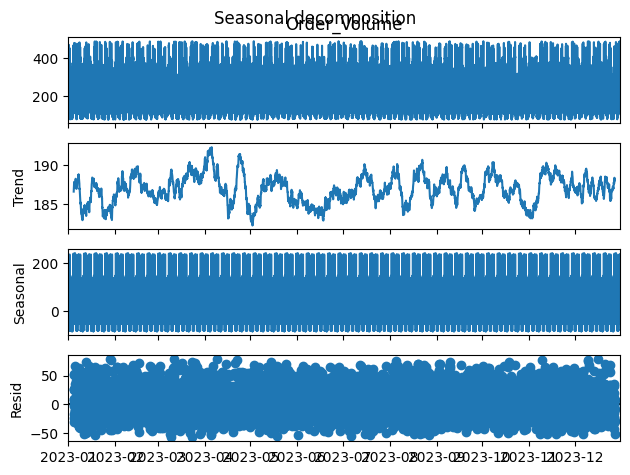

In [57]:
# Performing seasonal decomposition to analyze trends and patterns
decomposition=seasonal_decompose(order_volume,model='additive',period=24*7)
plt.figure(figsize=(24,22))
decomposition.plot()
plt.suptitle('Seasonal decomposition')
plt.show()


In [108]:
# Convert 'DateTime' to datetime format
product_data.loc[:,'DateTime']=pd.to_datetime (product_data['DateTime'])
# Add 'Week_number' column for weekly analysis
product_data.loc[:,'Week_number'] = product_data['DateTime'].dt.isocalendar().week

In [ ]:
# Group data by 'Week_number' ,'Location' and calculate total 'Order_Volume' for each week
weekly_aggregated_data=product_data.groupby(['Week_number','Location'])['Order_Volume'].sum()

In [ ]:
weekly_aggregated_data=weekly_aggregated_data.reset_index()
# Create a scatter plot for weekly milk order volume
fig=px.scatter(weekly_aggregated_data,x='Week_number',y='Order_Volume',color='Location',
               title=("Milk count by week number"),
               labels={'Week_number':'Week_number','Order_Volume':'Order_Volume','Location':'Location'})
fig.show()

<h1>Findings of Milk Consumption Based on DateTime, Location, and Weekly Analysis</h1><br>

<h3> Milk Consumption by DateTime (Hourly Analysis)</h3>
<h4>Key Observation: The highest milk order volume occurred on December 30 2023 in Indiranagar, with 487 orders. Hourly analysis reveals trends throughout the day.</h4>

<h3>Seasonal Decomposition of Milk Consumption</h3>
<h4>Key Observation: Seasonal decomposition shows weekly cycles in milk consumption, with regular trends and some irregular fluctuations. The additive model highlights both trend and seasonality.</h4>

<h3>Milk Consumption by Week Number</h3>
<h4>Key Observation: Week 14 in Indiranagar had the highest order volume of 31.968k, while week 32 recorded the lowest at 30.854k, indicating demand changes across the week</h4>


<h3>Conclusion</h3>

<h4><p>Milk consumption trends show hourly, seasonal, and weekly patterns.</p>
<p>Highest orders were seen on 30th December 2023 in Indiranagar.</p>
<p>Weekly analysis reveals a peak in week 14 and a dip in week 32</p></h4>

In [ ]:
# Find the maximum order volume grouped by day of the week ,month and location
maximum_order_volume=product_data.groupby(['Day_of_Week','Month','Location'])['Order_Volume'].max()
maximum_order_volume


Day_of_Week  Month      Location   
Friday       April      Indiranagar    373
             August     Indiranagar    378
             December   Indiranagar    370
             February   Indiranagar    378
             January    Indiranagar    370
                                      ... 
Wednesday    March      Indiranagar    485
             May        Indiranagar    487
             November   Indiranagar    485
             October    Indiranagar    484
             September  Indiranagar    485
Name: Order_Volume, Length: 84, dtype: int64

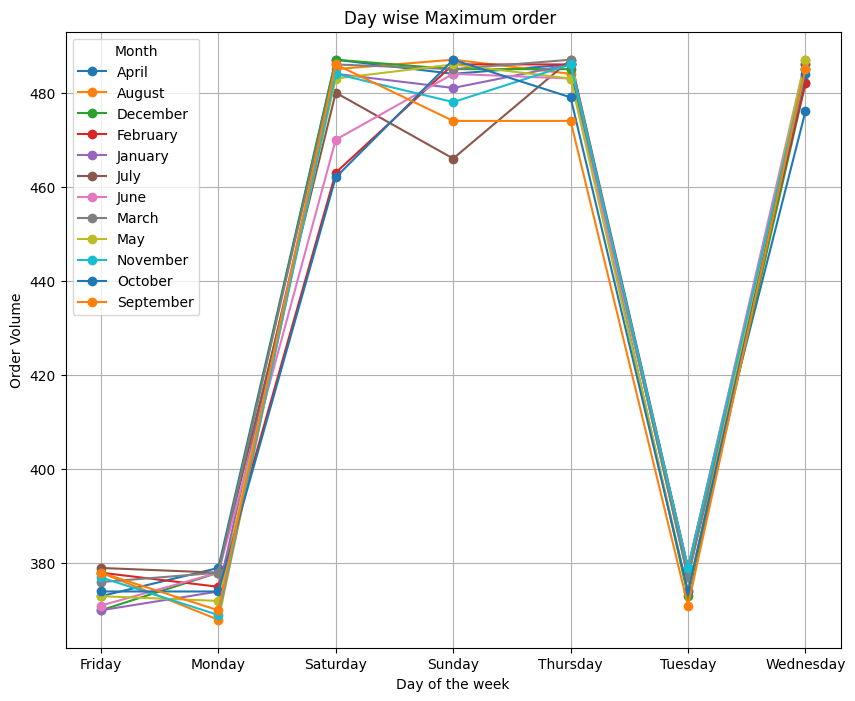

In [ ]:
maximum_order_volume=maximum_order_volume.reset_index()
#Pivot the data to show maximum order volume by day of the week and month
max_order_volume_by_weekday_month=maximum_order_volume.pivot(index='Day_of_Week',columns='Month',values='Order_Volume')
# Plot the pivoted data as a line plot
max_order_volume_by_weekday_month.plot(kind='line',figsize=(10,8),marker='o')
plt.title("Day wise Maximum order ")
plt.xlabel("Day of the week")
plt.ylabel("Order Volume")
plt.grid(True)
plt.show()

In [24]:
# Group the data by 'Day_of_Week', 'Location', and 'Week_number' and calculate the maximum order volume
maximum_order_volume_by_week=product_data.groupby(['Day_of_Week','Location','Week_number'])['Order_Volume'].max()
maximum_order_volume_by_week=maximum_order_volume_by_week.reset_index()
maximum_order_volume_by_week

,Day_of_Week,Location,Week_number,Order_Volume
0,Friday,Indiranagar,1,341
1,Friday,Indiranagar,2,370
2,Friday,Indiranagar,3,360
3,Friday,Indiranagar,4,350
4,Friday,Indiranagar,5,360
...,...,...,...,...
359,Wednesday,Indiranagar,48,485
360,Wednesday,Indiranagar,49,481
361,Wednesday,Indiranagar,50,482
362,Wednesday,Indiranagar,51,481


In [ ]:
# Plot max order volume by week, day, and location
fig=px.bar(maximum_order_volume_by_week,x='Day_of_Week',y='Order_Volume',color='Week_number',facet_col='Location',
          title=('Maximum Order Volume by Week Number, Day of Week, and Location'),
          labels={'Day_of_Week':'Day_of_Week','Week_number': 'Week Number', 'Order_Volume': 'Max Order Volume'})
fig.show()
          

In [74]:
# Grouping data by holiday status and day of the week, summing the order volume
holiday_order_volume=product_data.groupby(['Is_Holiday','Day_of_Week'])['Order_Volume'].sum().reset_index()
holiday_order_volume

,Is_Holiday,Day_of_Week,Order_Volume
0,0,Friday,199020
1,0,Monday,195348
2,0,Saturday,257761
3,0,Sunday,253599
4,0,Thursday,254017
5,0,Tuesday,195890
6,0,Wednesday,259758
7,1,Monday,3806
8,1,Sunday,4953
9,1,Thursday,4789


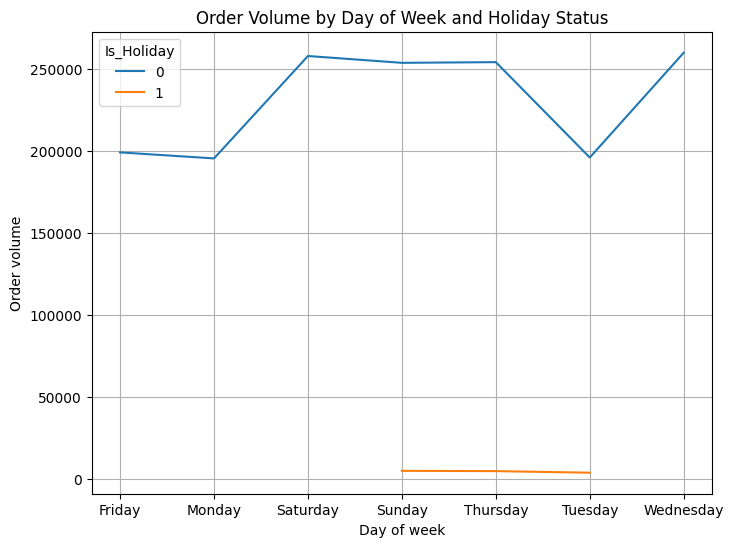

In [ ]:
# Pivoting the data to separate holiday and non-holiday order volume by day of the week
total_order_volume_on_holiday=holiday_order_volume.pivot(index='Day_of_Week',columns='Is_Holiday',values='Order_Volume')
# Plotting a line chart to show order volume by day of the week and holiday status
total_order_volume_on_holiday.plot(kind='line',figsize=(8,6))
plt.title('Order Volume by Day of Week and Holiday Status')
plt.xlabel('Day of week')
plt.ylabel('Order volume')
plt.grid(True)
plt.show()


<h1>Findings of Maximum Order Volume by Day of the Week, Month, Week, and Holiday Status</h1>

<h3>Maximum Order Volume by Day of the Week and Month:</h3>
<h4>Key Observations:</h4>
<p>On Friday in January, the order volume was lower compared to other days.</p>
<p>Monday and Tuesday in September showed the lowest order volume.</p>
<p>Saturday in December recorded the highest order volume.</p>
<p>Wednesday in May had the highest order volume, with 487 orders.</p>

<h3>Maximum Order Volume by Day of the Week, Week Number, and Location:</h3>
<h4>Key Observation:</h4>
<p>Sunday, week 52, recorded the highest order volume at Indiranagar, with 487 orders.</p>

<h3>Order Volume by Holiday Status:</h3>
<h4>Key Observation:</h4>
<p>On non-holidays (Is_Holiday = 0), Wednesday had the highest order volume, with 259,758 orders.</p>
<p>On holidays (Is_Holiday = 1), the order volume is significantly lower, with Sunday having 4953 orders and Monday 3806 orders.</p>

In [65]:
# Filtering the data for Sundays to analyze the effect of traffic on order volume
sunday_data=product_data[product_data['Day_of_Week']=='Sunday']
# Grouping the data by 'Traffic' and calculating the mean order volume for each traffic level
traffic_effect=sunday_data.groupby(['Traffic','Day_of_Week'])['Order_Volume'].mean().reset_index()
traffic_effect

,Traffic,Day_of_Week,Order_Volume
0,High,Sunday,214.468000
1,Low,Sunday,203.273476
2,Moderate,Sunday,208.030612


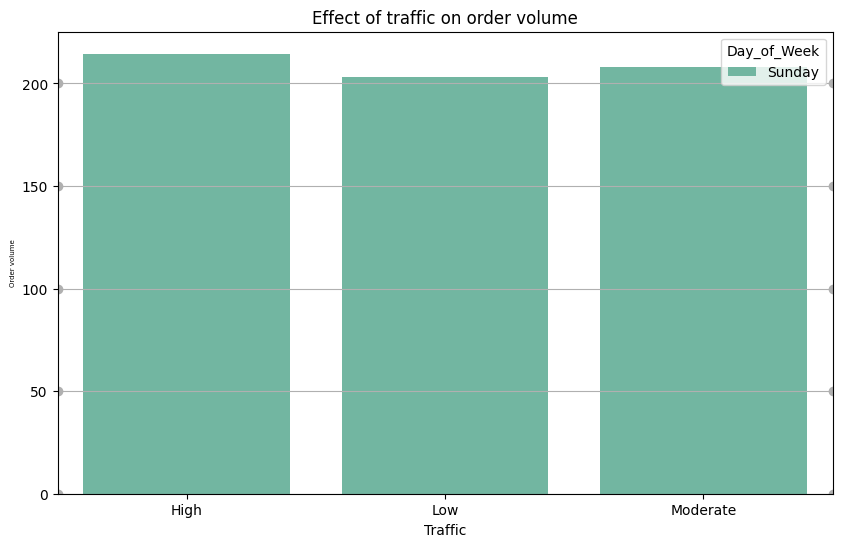

In [96]:
plt.figure(figsize=(10,6))
# Plotting the effect of traffic on order volume using a bar chart
sns.barplot(data=traffic_effect,x='Traffic',y='Order_Volume',hue='Day_of_Week',color='lightblue',palette='Set2')
plt.title("Effect of traffic on order volume")
plt.xlabel("Traffic")
plt.ylabel("Order volume",fontsize=5)
plt.grid(axis='y',marker='o')
plt.show()

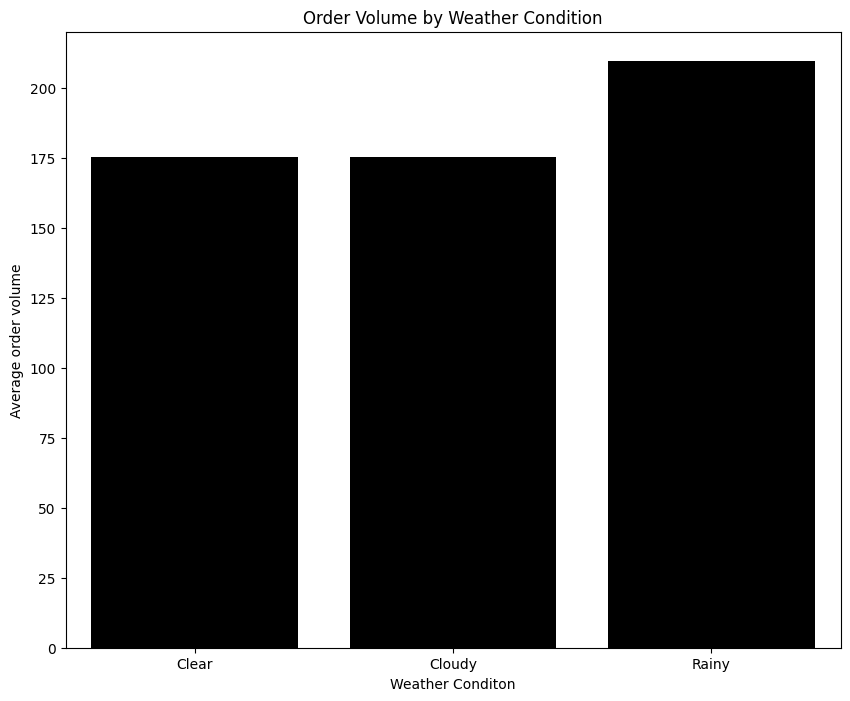

In [106]:
#Group data by 'Weather' and calculate the mean order volume 
weather_traffic_level=product_data.groupby('Weather')['Order_Volume'].mean().reset_index()
# Create a bar plot to show order volume by weather condition
plt.figure(figsize=(10,8))
sns.barplot(data=weather_traffic_level,x='Weather',y='Order_Volume',color='black')
plt.title('Order Volume by Weather Condition')
plt.xlabel('Weather Conditon')
plt.ylabel('Average order volume')
plt.show()

In [ ]:
# Group data by 'Coupon_Used' and calculate the mean order volume 
order_volume_by_weather=product_data.groupby('Coupon_Used')['Order_Volume'].mean().reset_index()
 #Create a line plot to visualize the average order volume based on coupon usage
fig=px.line(order_volume_by_weather,x='Coupon_Used',y='Order_Volume',
            title=('Average order volume by using Coupon'),
            labels={'Coupon_Used':'Coupon_Used','Order_Volume':'Order_Volume'})
fig.show()

In [ ]:
# Group data by 'Date' and 'Product', summing the 'Order_Volume' for each
sales_data = product_data.groupby(['Date', 'Product','Location'])['Order_Volume'].sum().reset_index()

# Create a line plot for sales by product over time
fig = px.line(sales_data, x='Date', y='Order_Volume', color='Product',facet_col='Location',
              title='Sales by Product Over Time', 
              labels={'Order_Volume': 'Order Volume', 'Product': 'Product','Location':'Location'})
fig.show()


In [33]:
# Calculate correlation between 'Order_Volume', 'Is_Holiday', 'Discount_Amount', and 'Seasonal_Demand_Factor'
correlation=product_data[['Order_Volume','Is_Holiday','Discount_Amount','Seasonal_Demand_Factor']].corr()
correlation

,Order_Volume,Is_Holiday,Discount_Amount,Seasonal_Demand_Factor
Order_Volume,1.000000,-0.005557,-0.010599,0.014711
Is_Holiday,-0.005557,1.000000,0.008500,-0.011062
Discount_Amount,-0.010599,0.008500,1.000000,0.013042
Seasonal_Demand_Factor,0.014711,-0.011062,0.013042,1.000000


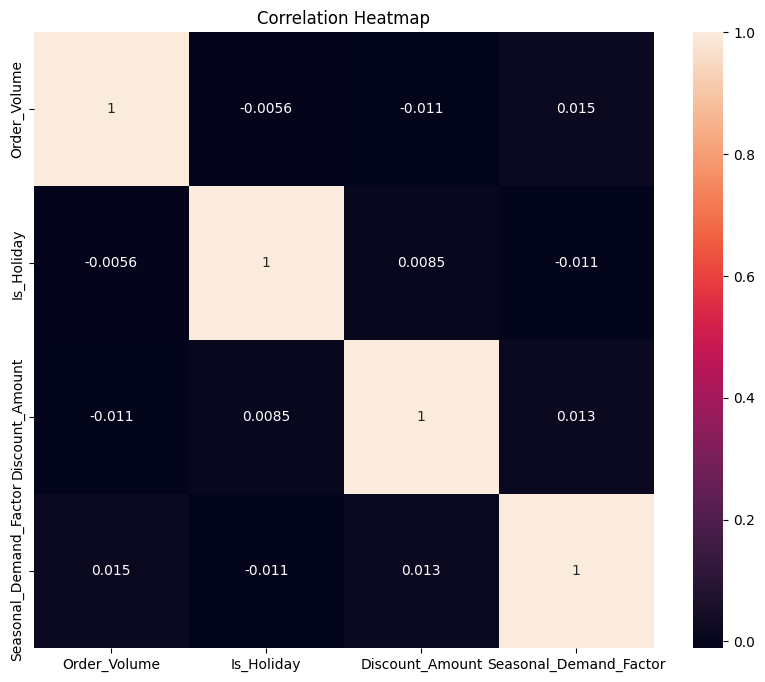

In [34]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)
plt.title('Correlation Heatmap')
plt.show()

<h1>Findings of Order Volume Based on Traffic, Weather, Coupon Usage, Sales, and Correlation Analysis</h1>

<h2>Effect of Traffic on Order Volume (Sundays):</h2>

<h3>Key Observations:</h3>
<p>High Traffic on Sundays results in the highest average order volume, with 214.47 orders.</p>
<p>Low Traffic leads to the lowest order volume, with 203.27 orders.</p>
<p>Moderate Traffic shows an intermediate order volume of 208.03.</p>

<h2>Order Volume by Weather Condition:</h2>

<h3>Key Observation:</h3>
<p>Rainy Weather leads to the highest average order volume.</p>
<p>Cloudy and Clear Weather conditions show similar order volumes, with no significant differences.<p>
<p>Plot Observation: The bar plot indicates that rainy weather causes a noticeable increase in order volume compared to clear or cloudy days.</p>

<h2>Impact of Coupon Usage on Order Volume:</h2>

<h3>Key Observation:</h3>
<p>Using Coupons increases the average order volume, indicating customers tend to buy more when using coupons.</p>
<p>Plot Observation: The line plot shows an upward trend in order volume when coupons are used.</p>


<h2>Sales by Product Over Time:<h2>

<h3>Key Observations:</h3>
<p>On January 1st, 2023, the order volume for milk in Indiranagar was 4830.</p>
<p>By December 2023, the order volume had increased to 5019, with the highest order volume of 5368 observed on March 11th, 2023.</p>
<p>Plot Observation: The line plot clearly shows the increase in milk order volume over time, with a peak in March 2023.</p>


<h2>Correlation Analysis Between Order Volume, Holiday Status, Discount, and Seasonal Demand:</h2>

<h3>Key Observations:</h3>
<p>There is a very weak negative correlation between order volume and holiday status (-0.0056).</p>
<p>The correlation between order volume and discount amount is also weak (-0.0106).</p>
<p>The seasonal demand factor has a very weak positive correlation (0.0147) with order volume.</p>
<p>There is a 0.0085 correlation between Discount Amount and Holiday Status, indicating a very weak positive relationship between these two variable</p>
<p>Plot Observation: The correlation between order volume and factors like holidays, discounts, and seasonal demand is very weak. </p>

Text(0.5, 0.98, '')

<Figure size 2400x2200 with 0 Axes>

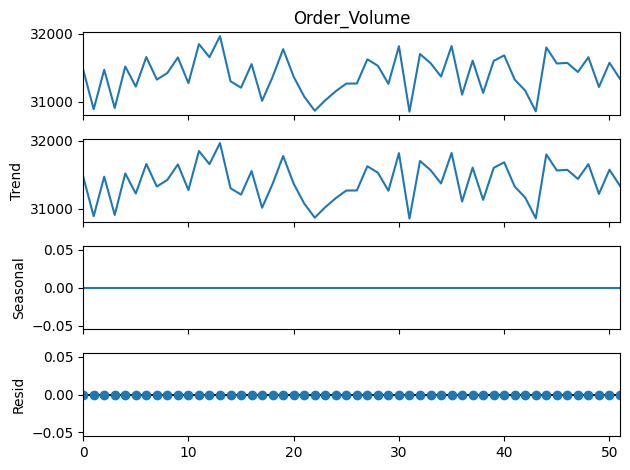

In [35]:
# Perform seasonal decomposition of 'Order_Volume' using an additive model
decomposition=seasonal_decompose(weekly_aggregated_data['Order_Volume'],model='additive',period=1)
# Plot the decomposition components (trend, seasonal, residual)
plt.figure(figsize=(24,22))
decomposition.plot()
plt.suptitle('')

<h2>Findings from Seasonal Decomposition:</h2>

<h3>Trend Component:</h3>
<p>The trend shows the overall direction of the milk order volume over time.</p>
<p>The trend is relatively stable, with small fluctuations, indicating no major long-term increase or decrease in order volume.</p><br>

<h3>Seasonal Component:</h3>
<p>The seasonal component reveals patterns that repeat over time, showing periodic increases and decreases.</p>
<p>It shows random fluctuations, suggesting that other factors, such as external events or promotions, may cause predictable changes in order volume.</p><br>

<h2>Key Observations:</h3>
<p>Milk order volume exhibits both trend and seasonal cycles, with clear weekly patterns.</p>
<p>Irregular fluctuations exist, but they don't appear to follow a specific pattern.</p>

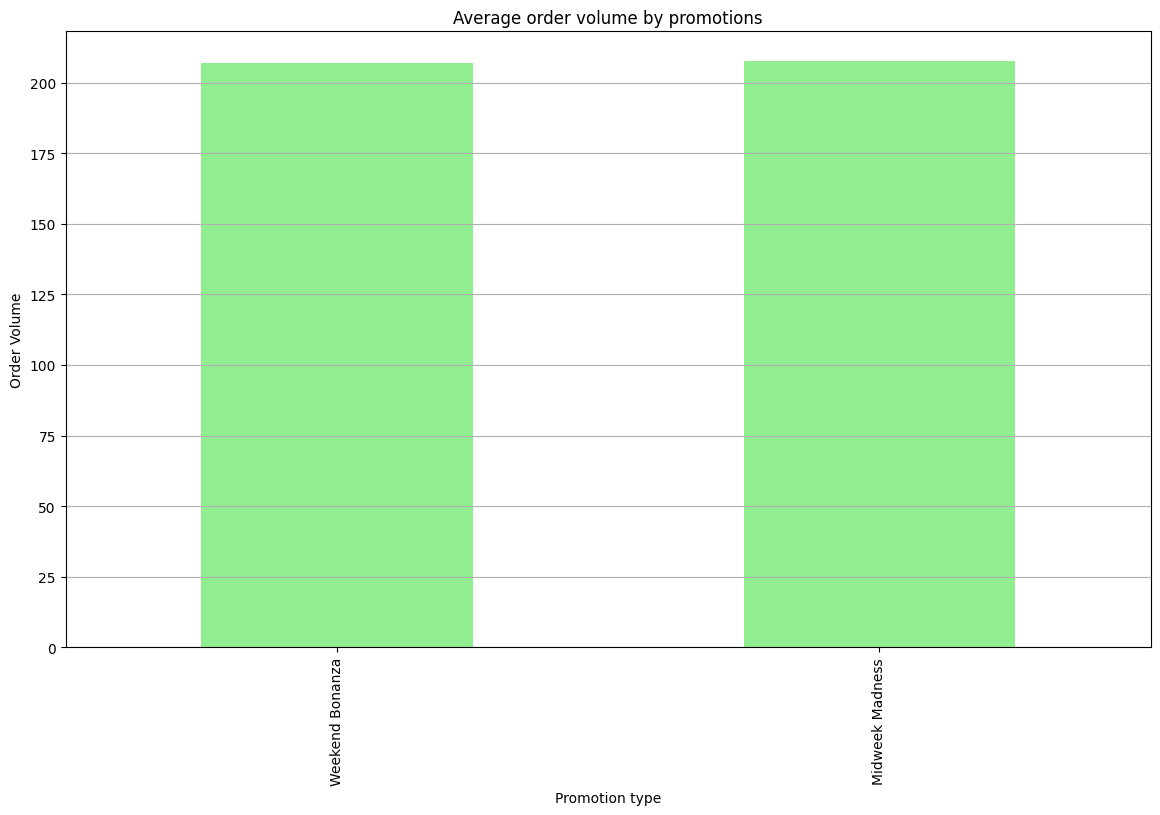

In [36]:
# Group data by 'Promotion' and calculate the average 'Order_Volume' for each promotion type
order_volume_by_promotion=product_data.groupby('Promotion')['Order_Volume'].mean().sort_values()
plt.figure(figsize=(14,8))
# Create a bar plot to visualize average order volume by promotion type
order_volume_by_promotion.plot(kind='bar',color='lightgreen')
plt.title("Average order volume by promotions")
plt.xlabel('Promotion type')
plt.ylabel('Order Volume')
plt.grid(axis='y')
plt.show()

In [102]:
# Group by 'Promotion' and 'Traffic' and calculate average order volume
promotion_by_traffic=product_data.groupby(['Promotion','Traffic','Location'])['Order_Volume'].mean().reset_index()
# Plot the bar chart
fig=px.bar(promotion_by_traffic,x='Promotion',y='Order_Volume',color='Traffic',facet_col='Location',
           title=('Average order volume by promotion type and traffic level'),
           labels={'Promotion':'Promotion','Order_Volume':'Order_Volume','Traffic':'Traffic' ,'Location':'Location'              
           })
fig.show()

In [38]:
# Grouping the data by 'Promotion' and 'Location', and counting the number of occurrences in the 'Traffic' column
promotion_by_location=product_data.groupby(['Promotion','Location'])['Traffic'].count().reset_index()
promotion_by_location

,Promotion,Location,Traffic
0,Midweek Madness,Indiranagar,2496
1,Weekend Bonanza,Indiranagar,2497


In [39]:
# Plotting the count
fig=px.bar(promotion_by_location,x='Promotion',y="Traffic",color='Location',
            title=('Traffic on location if promotion is available'),
            labels={'Promotion':'Promotion','Traffic':'Traffic','Location':'Location'})
fig.show()

<h1>Promotion Insights:</h1>

<h3>Average Order Volume by Promotion:</h3>

<p>Different promotions affect the average order volume, with slight differences observed between 'Weekend Bonanza' and 'Weekend Madness' promotions.</p><p> This suggests that both promotions are similar in terms of their impact on order volume.</p><br>


<h3>Effect of Traffic and Order Volume on Promotions:</h3>

<h4>Weekend Madness:</h4>
<p>In moderate traffic, the average order volume is 210.</p>
<p>In low traffic, the average order volume is 207.</p>
<p>In high traffic, the average order volume is 204.</p><br>

<h4>Weekend Bonanza:</h4>
<p>In moderate traffic, the average order volume is 209.</p>
<p>In low traffic, the average order volume is 203.</p>
<p>In high traffic, the average order volume is 201.</p><br>

<p>Weekend Madness has slightly higher order volumes than Weekend Bonanza across all traffic levels.</p> <p>Both promotions show a decrease in order volume as traffic increases, with high traffic having the lowest order volume.</p>


<h4>Traffic Distribution by Promotion and Location:</h4>
<p>The traffic for 'Midweek Madness' and 'Weekend Bonanza' in 'Indiranagar' is almost equal, with 2496 and 2497 occurrences, showing balanced traffic distribution.</p><br>

<h3>Conclusion:<h3><br>

The seasonal decomposition reveals periodic trends in order volume, with fluctuations influenced by seasonality and irregular events.</p>
<p>Promotions like 'Weekend Bonanza' and 'Weekend Madness' have similar effects on order volume, with slight variations observed based on traffic levels.</p>
<p>Traffic data for promotions in 'Indiranagar' location shows a fairly equal distribution, indicating that both promotions attract similar amounts of traffic.</p>

In [ ]:
# Add 'Season' based on month directly
product_data.loc[:,'Season']=product_data['DateTime'].dt.month % 12//3+1
# Group by 'Season' and sum 'Order_Volume'
seasonal_data=product_data.groupby(product_data['Season'].map({1:'Winter',2:'Summer',3:'Rain',4:'Spring'}))['Order_Volume'].sum().reset_index()
seasonal_data


,Season,Order_Volume
0,Rain,411881
1,Spring,408900
2,Summer,414276
3,Winter,397700


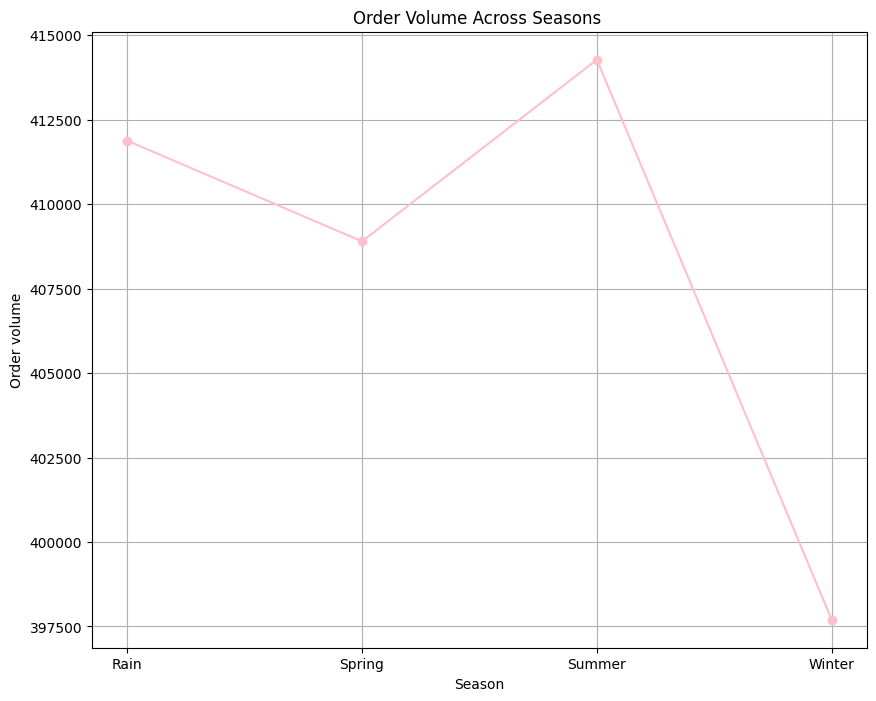

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(seasonal_data['Season'],seasonal_data['Order_Volume'],marker='o',color='pink')
plt.title('Order Volume Across Seasons ')
plt.xlabel('Season')
plt.ylabel('Order volume')
plt.grid(True)
plt.show()

<h2>Findings from Seasonal Analysis:</h2>

<h4>Seasonal Order Volume:</h4>

<p>Summer has the highest order volume at 414,276.</p>
<p>Winter has the lowest order volume at 397,700.</p>
<p>Rain and Spring have similar order volumes, with Rain at 411,881 and Spring at 408,900.</p>


<h4>Trend:</h4>

<p>There is a visible trend with Summer showing the highest order volume, followed by Rain, Spring, and Winter, in that order.</p>

<h4>Seasonal Variations:</h4>
<p>The data highlights seasonal variations in order volume, showing a peak in Summer, followed by steady demand in Rain and Spring, with a decline in Winter.</p>

<h4>Conclusion:</h4>
<p>Summer has the highest order volume, indicating stronger demand during this season.</p>
<p>Winter has the lowest order volume, suggesting weaker demand in colder months.</p>
<p>Rain and Spring show relatively similar order volumes, falling in between Summer and Winter.</p>
<p>The analysis reveals that order volumes fluctuate with the seasons, with Summer leading and Winter trailing behind.</p>